In [6]:
import pandas as pd
import math
#import pandas_datareader as pdr
#import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
import numpy as np
import fix_yahoo_finance as yf
r=input()
data = yf.download(r, start="2012-01-01", end="2017-08-01")
t=pd.DataFrame(data)
t.drop('Adj Close',axis=1,inplace=True)
t=t[['Open','High','Low','Volume','Close']]
t['OC_Change']=(t['Close']-t['Open'])
t['HL_Change']=(t['High']-t['Low'])
#t=t[['Close','HL_Change','OC_Change','Volume']]
fc='Close'
fo=int(math.ceil(0.01*len(t)))
t.dropna(inplace=True)

t['target']=0


ModuleNotFoundError: No module named 'fix_yahoo_finance'

In [3]:
t['target'][t['OC_Change']>0]=1
#t.drop(['HL_Change','OC_Change'],axis=1,inplace=True)
#for i in range(0,len(t)-1):
#    t['target'][i+1]=t['Close'][i+1]-t['Close'][i]

t['target']=t.Close.diff()
t['target'][0]=0
t['targ']=0
t['targ'][t['target']>0]=1
t
t.drop(['target','HL_Change','Open','Low','High'],axis=1,inplace=True)
t

/home/tarun/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Volume,Close,OC_Change,targ
Date,,,,
2012-01-03,7345600,333.038025,6.241242,0
2012-01-04,5722200,334.474487,1.626648,1
2012-01-05,6559200,329.834839,-1.561554,0
2012-01-06,5380400,325.335327,-4.569580,0
2012-01-09,11633500,311.541534,-12.032044,0
2012-01-10,8782400,311.881897,-3.308289,1
2012-01-11,4795200,313.293304,1.231231,1
2012-01-12,3746600,315.135132,-0.790802,1
2012-01-13,4609900,312.807800,-0.635651,0


In [4]:
#t.drop(['Open'],axis=1,inplace=True)

In [1]:


X = t.iloc[:,0:3].values
y = t.iloc[:, 3].values
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
cl=SVC(kernel='poly',random_state=0) 
cl.fit(X_train, y_train)

# Predicting the Test set results
y_pred = cl.predict(X_train)
pp=cl.score(X_train,y_train)
print(pp*100)
X

NameError: name 't' is not defined

In [6]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


0.829804045512


In [7]:
t.tail()

,Volume,Close,OC_Change,targ
Date,,,,
2017-07-25,5933600,969.030029,-1.669983,0
2017-07-26,2221600,965.309998,-7.470031,0
2017-07-27,3717900,952.510010,-16.669983,0
2017-07-28,1813800,958.330017,10.340027,1
2017-07-31,2283500,945.500000,-14.500000,0


In [8]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) # make the predictions by the model

# Print out the statistics
r=t
model.summary()

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/tarun/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     81.73
Date:                Tue, 03 Oct 2017   Prob (F-statistic):           8.24e-48
Time:                        11:22:52   Log-Likelihood:                -1113.6
No. Observations:                1122   AIC:                             2233.
Df Residuals:                    1119   BIC:                             2248.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0312      0.023      1.352      0.177      -0.014       0.077
x2             0.0341      0.023      1.480      0.139      -0.011       0.079
x3             0.3054      0.020     15.615      0.000       0.267       0.344
==============================================================================
Omnibus:                      209.860   Durbin-Watson:                   0.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.650
Skew:                          -0.091   Prob(JB):                     1.22e-10
Kurtosis:                       2.029   Cond. No.                         1.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
cl=Sequential()
cl.add(Dense(output_dim=3,init='uniform',activation='relu',input_dim=3))
cl.add(Dense(output_dim=3,init='uniform',activation='relu'))
cl.add(Dense(output_dim=1,init='uniform',activation='sigmoid'))
cl.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
cl.fit(X_train,y_train,batch_size=10,nb_epoch=100)


/home/tarun/.local/lib/python3.5/site-packages/keras/backend/__init__.py:27: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/tarun/.keras/keras.json' mode='r' encoding='UTF-8'>
  _config = json.load(open(_config_path))
Using TensorFlow backend.
/usr/lib/python3.5/importlib/_bootstrap_external.py:415: ImportWarning: Not importing directory /home/tarun/.local/lib/python3.5/site-packages/google: missing __init__
  _warnings.warn(msg.format(portions[0]), ImportWarning)
/home/tarun/.local/lib/python3.5/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/home/tarun/.local/lib/python3.5/site-packages/tensorflow/contrib/keras/python/keras/backend.py:4013: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/tarun/.keras/keras.json' mode='r' encoding='UTF-8'>
  _config = json.load(open(_config_path))
/home/tarun/.l

Epoch 1/100
1122/1122 [==============================] - 1s - loss: 0.6917 - acc: 0.5472     
Epoch 2/100
1122/1122 [==============================] - 0s - loss: 0.6662 - acc: 0.8173     
Epoch 3/100
1122/1122 [==============================] - 0s - loss: 0.5873 - acc: 0.8200     
Epoch 4/100
1122/1122 [==============================] - 0s - loss: 0.4943 - acc: 0.8244     
Epoch 5/100
1122/1122 [==============================] - 0s - loss: 0.4335 - acc: 0.8333     
Epoch 6/100
1122/1122 [==============================] - 0s - loss: 0.4022 - acc: 0.8351     
Epoch 7/100
1122/1122 [==============================] - 0s - loss: 0.3871 - acc: 0.8342     
Epoch 8/100
1122/1122 [==============================] - 0s - loss: 0.3820 - acc: 0.8369     
Epoch 9/100
1122/1122 [==============================] - 0s - loss: 0.3782 - acc: 0.8387     
Epoch 10/100
1122/1122 [==============================] - 0s - loss: 0.3772 - acc: 0.8396     
Epoch 11/100
1122/1122 [==============================] - 0

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
t_x = t
vif["vif factor"] = [variance_inflation_factor(r.values, i) for i in range(t_x.shape[1])]

vif["features"] = t_x.columns
vif

,vif factor,features
0,2.066402,Volume
1,2.815268,Close
2,1.582583,OC_Change
3,3.193936,targ


In [12]:
y_pred=cl.predict(X_test)
y_pred[y_pred>0.5]=1
y_pred[y_pred<0.5]=0
y_pred

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
      

In [13]:
t.Close[0:100]

Date
2012-01-03    333.038025
2012-01-04    334.474487
2012-01-05    329.834839
2012-01-06    325.335327
2012-01-09    311.541534
2012-01-10    311.881897
2012-01-11    313.293304
2012-01-12    315.135132
2012-01-13    312.807800
2012-01-17    314.604614
2012-01-18    316.771759
2012-01-19    320.105103
2012-01-20    293.288300
2012-01-23    293.053040
2012-01-24    290.755768
2012-01-25    285.030029
2012-01-26    284.334320
2012-01-27    290.280273
2012-01-30    289.134125
2012-01-31    290.345337
2012-02-01    290.705719
2012-02-02    292.847839
2012-02-03    298.463470
2012-02-06    304.849854
2012-02-07    303.688690
2012-02-08    305.230225
2012-02-09    306.036041
2012-02-10    303.258270
2012-02-13    306.406403
2012-02-14    305.185181
                 ...    
2012-04-13    312.612610
2012-04-16    303.338348
2012-04-17    305.090088
2012-04-18    304.029022
2012-04-19    299.949951
2012-04-20    298.328339
2012-04-23    299.099091
2012-04-24    300.935944
2012-04-25    305.16

In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[109,  21],
       [ 28, 123]])

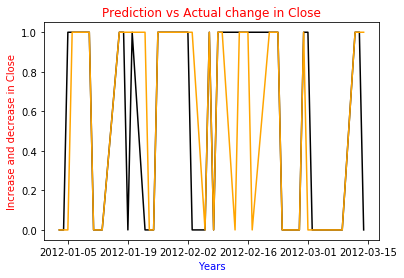

In [15]:
#plt.plot(t.index)
plt.plot(t.index[0:50],y_test[0:50],color='black')
plt.plot(t.index[0:50],y_pred[0:50],color='orange')
plt.xlabel('Years',color='blue')
plt.ylabel('Increase and decrease in Close',color='red')
plt.title('Prediction vs Actual change in Close',color='red')
plt.show()

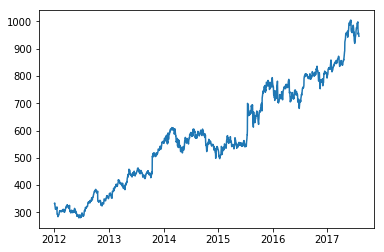

In [16]:
plt.plot(t.index,t.Close)
plt.show()